In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
phone_df = pd.read_csv('D:\Rishabh\coding\python\machine learning\PhonePricePrecdictor\smartphones_cleaned_v6.csv')

phone_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [4]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [5]:
phone_df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [6]:
phone_df.drop(columns=['model', 'processor_brand', 'os'], inplace=True)

In [7]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   price                      980 non-null    int64  
 2   rating                     879 non-null    float64
 3   has_5g                     980 non-null    bool   
 4   has_nfc                    980 non-null    bool   
 5   has_ir_blaster             980 non-null    bool   
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  screen_size                980 non-null    float64

In [8]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

bool_data = phone_df[['has_5g', 'has_nfc', 'has_ir_blaster']]

int_data = encoder.fit_transform(bool_data)

encoded_df = pd.DataFrame(int_data, columns=bool_data.columns)
encoded_df.head()

,has_5g,has_nfc,has_ir_blaster
0,1.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [9]:
phone_df.update(encoded_df)

phone_df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,54999,89.0,1.0,1.0,0.0,8.0,3.2,5000.0,1,...,6.70,120,3,1.0,50.0,16.0,0,NaN,1440,3216
1,oneplus,19989,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1,...,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,samsung,16499,75.0,1.0,0.0,0.0,8.0,2.4,5000.0,1,...,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
3,motorola,14999,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1,...,6.55,120,3,1.0,50.0,16.0,1,1024.0,1080,2400
4,realme,24999,82.0,1.0,0.0,0.0,8.0,2.6,5000.0,1,...,6.70,120,3,1.0,108.0,16.0,0,NaN,1080,2412


In [10]:
phone_df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

In [11]:
phone_df.isnull().sum()

brand_name                     0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [13]:
phone_df_num = phone_df.drop('brand_name', axis=1)

In [14]:
X = imputer.fit_transform(phone_df_num)

In [15]:
phone_df_tr = pd.DataFrame(X, columns=phone_df_num.columns)
phone_df_tr.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,54999.0,89.0,1.0,1.0,0.0,8.0,3.2,5000.0,1.0,100.0,...,6.70,120.0,3.0,1.0,50.0,16.0,0.0,1024.0,1440.0,3216.0
1,19989.0,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1.0,33.0,...,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,1080.0,2412.0
2,16499.0,75.0,1.0,0.0,0.0,8.0,2.4,5000.0,1.0,15.0,...,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,1080.0,2408.0
3,14999.0,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1.0,33.0,...,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,1080.0,2400.0
4,24999.0,82.0,1.0,0.0,0.0,8.0,2.6,5000.0,1.0,67.0,...,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,1080.0,2412.0


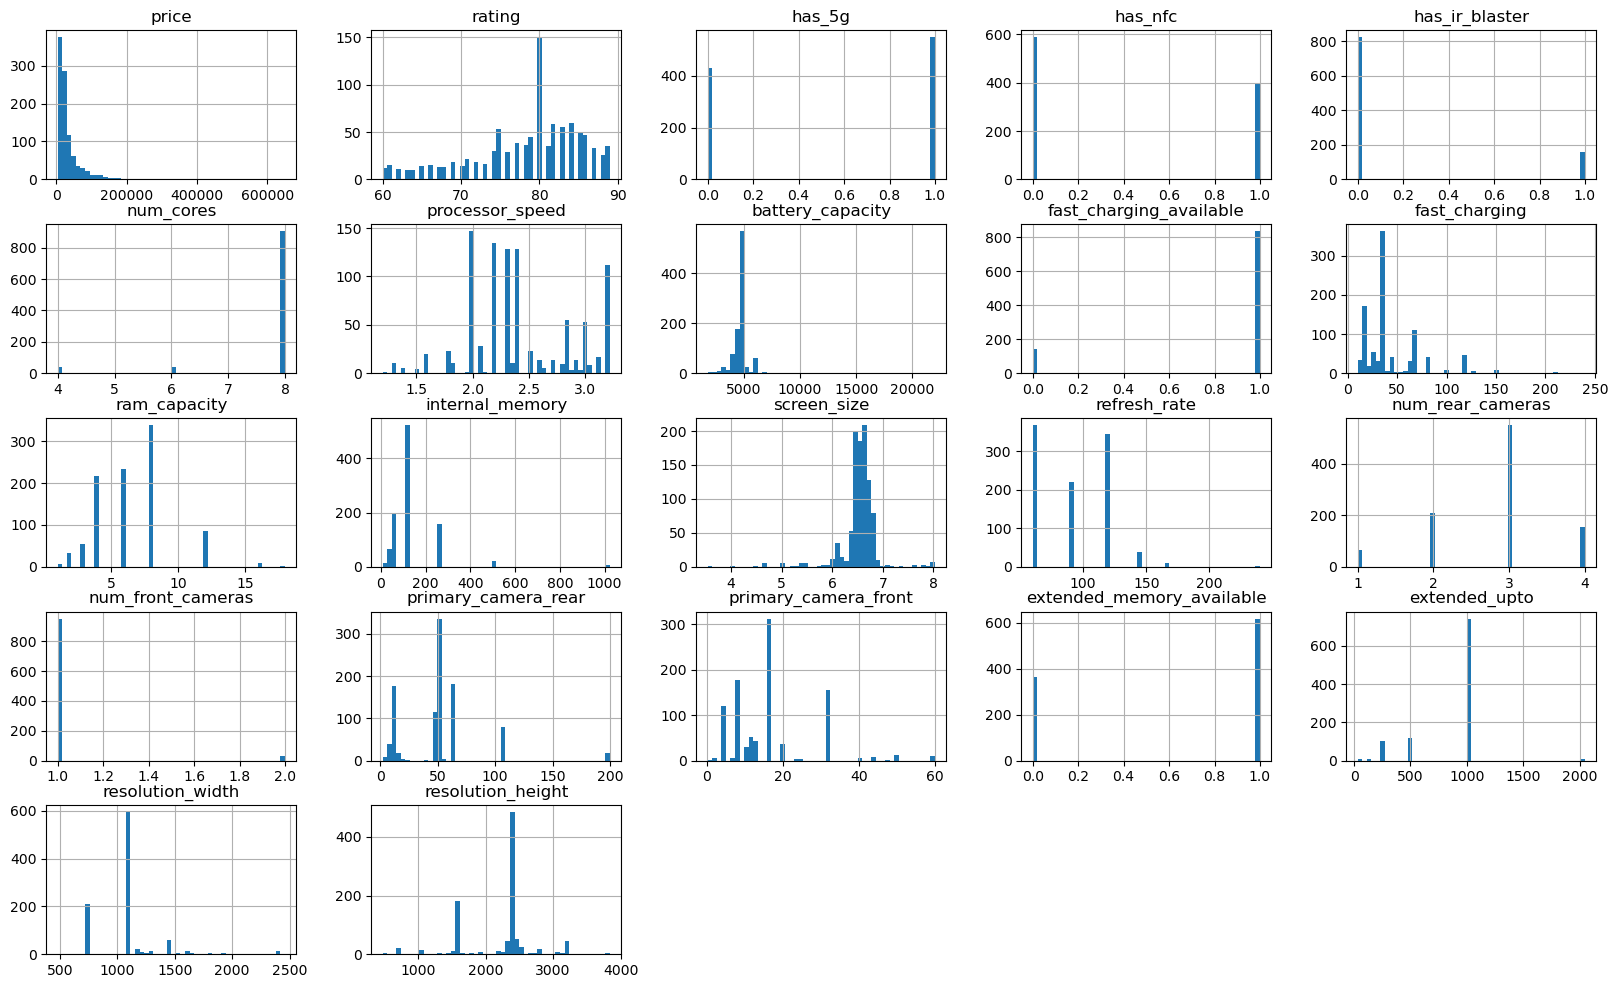

In [16]:
phone_df_tr.hist(bins=50, figsize=(20, 12))
plt.show()

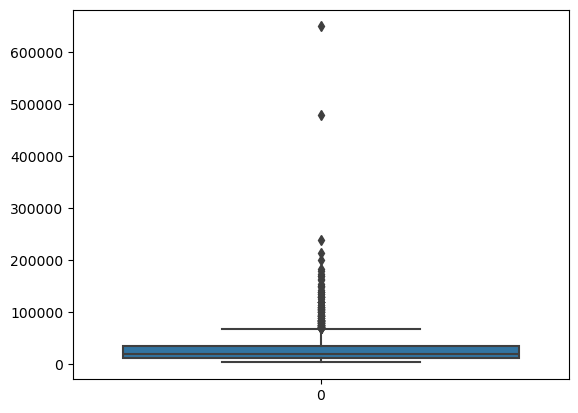

In [17]:
sns.boxplot(phone_df_tr['price'])
plt.show()

In [18]:
q1=phone_df_tr["price"].quantile(0.25)
q3=phone_df_tr["price"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone_df_tr.loc[phone_df_tr["price"]>ul, "price"]=ul

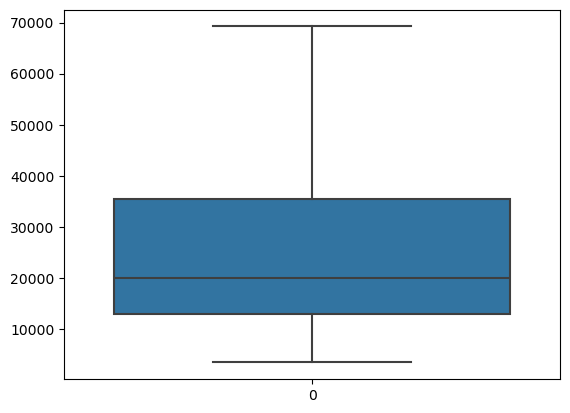

In [19]:
sns.boxplot(phone_df_tr['price'])
plt.show()

In [20]:
phone_df_tr.head()

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,54999.0,89.0,1.0,1.0,0.0,8.0,3.2,5000.0,1.0,100.0,...,6.70,120.0,3.0,1.0,50.0,16.0,0.0,1024.0,1440.0,3216.0
1,19989.0,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1.0,33.0,...,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,1080.0,2412.0
2,16499.0,75.0,1.0,0.0,0.0,8.0,2.4,5000.0,1.0,15.0,...,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,1080.0,2408.0
3,14999.0,81.0,1.0,0.0,0.0,8.0,2.2,5000.0,1.0,33.0,...,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,1080.0,2400.0
4,24999.0,82.0,1.0,0.0,0.0,8.0,2.6,5000.0,1.0,67.0,...,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,1080.0,2412.0


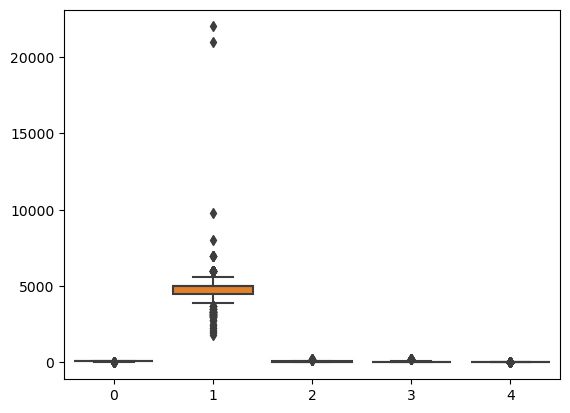

In [21]:
sns.boxplot([phone_df_tr['rating'], phone_df_tr['battery_capacity'],
             phone_df_tr['fast_charging'], phone_df_tr['primary_camera_rear'],
             phone_df_tr['primary_camera_front']])

plt.show()

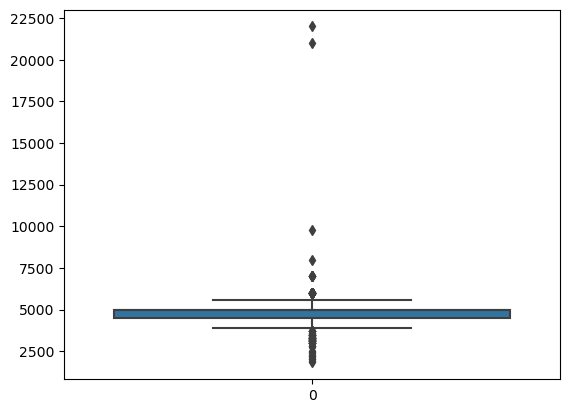

In [22]:
sns.boxplot(phone_df_tr['battery_capacity'])
plt.show()

In [23]:
q1=phone_df_tr["battery_capacity"].quantile(0.25)
q3=phone_df_tr["battery_capacity"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

phone_df_tr.loc[phone_df_tr["battery_capacity"]>ul, "battery_capacity"]=ul

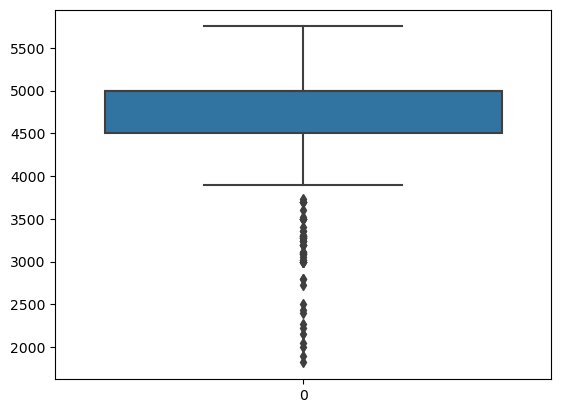

In [24]:
sns.boxplot(phone_df_tr['battery_capacity'])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(phone_df_tr, test_size=0.2, random_state=42)

In [27]:
train_set_x = train_set.drop('price', axis=1)

train_set_x.head()

,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
481,86.0,1.0,1.0,0.0,8.0,2.84,4000.0,1.0,21.0,8.0,...,6.10,120.0,3.0,1.0,12.0,8.0,1.0,1024.0,1080.0,2520.0
974,80.0,1.0,1.0,0.0,8.0,3.20,4800.0,1.0,66.0,12.0,...,8.03,120.0,3.0,1.0,50.0,32.0,0.0,1024.0,1916.0,2160.0
667,70.0,1.0,0.0,0.0,8.0,2.20,5000.0,1.0,15.0,4.0,...,6.51,60.0,2.0,1.0,13.0,5.0,1.0,1024.0,720.0,1600.0
589,79.0,1.0,0.0,0.0,8.0,2.20,5000.0,1.0,15.0,6.0,...,6.60,90.0,3.0,1.0,48.0,8.0,1.0,1024.0,1080.0,2408.0
33,73.0,0.0,1.0,0.0,6.0,2.65,3110.0,0.0,33.0,4.0,...,6.10,60.0,2.0,1.0,12.0,12.0,0.0,1024.0,828.0,1792.0


In [28]:
train_set_y = train_set[['price']]

train_set_y.head()

,price
481,69230.25
974,69230.25
667,13999.00
589,17990.00
33,38999.00


### Training the training set

In [29]:
### LINEAR REGRESSIOON 

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(train_set_x, train_set_y)

LinearRegression()

In [35]:
some_data = train_set_x.iloc[:5]
some_price = train_set_y.iloc[:5]

print('Predictions: ', lin_reg.predict(some_data))
print(train_set_y[:5])

Predictions:  [[41789.56933872]
 [64240.5733201 ]
 [10727.28901847]
 [20296.59001359]
 [44538.958048  ]]
        price
481  69230.25
974  69230.25
667  13999.00
589  17990.00
33   38999.00


In [38]:
from sklearn.metrics import mean_squared_error, r2_score

phone_df_predictions_1 = lin_reg.predict(train_set_x)
lin_mse = mean_squared_error(train_set_y, phone_df_predictions_1)
lin_rmse = np.sqrt(lin_mse)

lin_r2 = r2_score(train_set_y, phone_df_predictions_1)

print(lin_rmse)
print(lin_r2)

9017.280153644162
0.7871452672418212


In [37]:
### DECISION TREE REGRESSION 

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_x, train_set_y)

DecisionTreeRegressor()

In [39]:
phone_df_predictions_2 = tree_reg.predict(train_set_x)
tree_mse = mean_squared_error(train_set_y, phone_df_predictions_2)
tree_rmse = np.sqrt(tree_mse)

tree_r2 = r2_score(train_set_y, phone_df_predictions_2)

print(tree_rmse)
print(tree_r2)

175.15861677037634
0.999919685270817


In [40]:
### Cross validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_set_x, train_set_y, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores = np.sqrt(-scores)

In [41]:
def display_scores(scores):
    print('scores: ', scores)
    print('mean: ', scores.mean())
    print('standard deviation: ', scores.std())
    
display_scores(tree_rmse_scores) ### decision tree is kinda overfitting

scores:  [ 8369.14974562  9100.35614539  9860.53972196  8537.82984374
 11445.00358515]
mean:  9462.57580837161
standard deviation:  1119.8512316119238


In [42]:
### Random Forest Regrssor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_x, train_set_y)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12856\573720601.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(train_set_x, train_set_y)


RandomForestRegressor()

In [43]:
phone_df_predictions_3 = forest_reg.predict(train_set_x)
forest_mse = mean_squared_error(train_set_y, phone_df_predictions_3)
forest_rmse = np.sqrt(forest_mse)

forest_r2 = r2_score(train_set_y, phone_df_predictions_3)

print(forest_rmse)
print(forest_r2)

2592.0666100565118
0.9824116742356493


In [44]:
### cross validation 

scores = cross_val_score(forest_reg, train_set_x, train_set_y, scoring='neg_mean_squared_error', cv=5)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

scores:  [6016.18690487 7738.1730132  7277.17759841 6939.92313794 7411.03354153]
mean:  7076.498839189718
standard deviation:  588.7125723558745


In [45]:
### lasso regression 

from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(train_set_x, train_set_y)

Lasso()

In [46]:
phone_df_predictions_4 = lasso_reg.predict(train_set_x)
lasso_mse = mean_squared_error(train_set_y, phone_df_predictions_4)
lasso_rmse = np.sqrt(lasso_mse)

lasso_r2 = r2_score(train_set_y, phone_df_predictions_4)

print(lasso_rmse)
print(lasso_r2)

9017.286784029662
0.7871449542185085


In [47]:
### ridge regression 

from sklearn.linear_model import Ridge

ridge_reg = Ridge()

ridge_reg.fit(train_set_x, train_set_y)

Ridge()

In [48]:
phone_df_predictions_5 = ridge_reg.predict(train_set_x)
ridge_mse = mean_squared_error(train_set_y, phone_df_predictions_5)
ridge_rmse = np.sqrt(ridge_mse)

ridge_r2 = r2_score(train_set_y, phone_df_predictions_5)

print(ridge_rmse)
print(ridge_r2)

9017.569457978076
0.7871316088473888


In [52]:
### fine tuning model with grid search 

from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(train_set_x, train_set_y)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [55]:
final_model = grid_search.best_estimator_

### Evaluating the test set 

In [56]:
test_set_x = test_set.drop('price', axis=1)
test_set_y = test_set[['price']]

final_predictions = final_model.predict(test_set_x)

In [57]:
final_mse = mean_squared_error(test_set_y, final_predictions)
final_rmse = np.sqrt(final_mse)

final_r2 = r2_score(test_set_y, final_predictions)

print('final_rmse: ', final_rmse)
print('final_r2: ', final_r2)

final_rmse:  6531.647035907016
final_r2:  0.8893575419133505
